In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
# Import Normalizer
from sklearn.preprocessing import Normalizer
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import Circle, Wedge, Polygon, Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [3]:
las_old=pd.read_csv('WellX.csv', header=0) #  
las_old.columns = ['Depth', 'Gamma-ray', 'Shale_volume', 'Restivity', 'Delta T', 'Vp', 'Vs',\
              'density', 'density_calculated', 'Neutron Porosity', 'Density_porosity', 'Poissons_ratio','classification']
#'classification'

In [3]:
las_old[las_old.classification == 1].classification.sum()


12

In [27]:
las_old.Vp=(las_old.Vp)*0.0003048 # ft/s to km/s 0.0003048
las_old.head(15)

,Depth,Gamma-ray,Shale_volume,Restivity,Delta T,Vp,Vs,density,density_calculated,Neutron Porosity,Density_porosity,Poissons_ratio,classification
0,4000,73.215,0.7965,0.25,137.81,2.054774e-07,2799.0030,2.1278,2.1278,-999.25,0.2818,0.4126,4
1,4001,69.152,0.7391,0.20,138.06,2.051054e-07,2804.5841,2.1202,2.1202,-999.25,0.2893,0.4118,4
2,4002,65.965,0.6940,0.21,138.06,2.051054e-07,2817.0360,2.1149,2.1149,-999.25,0.2946,0.4109,4
3,4003,68.215,0.7258,0.27,137.31,2.062257e-07,2839.0723,2.1217,2.1217,-999.25,0.2889,0.4104,4
4,4004,70.840,0.7630,0.36,136.31,2.077386e-07,2870.3577,2.1301,2.1301,-999.25,0.2819,0.4096,4
5,4005,62.262,0.6415,0.52,134.31,2.108320e-07,2989.7909,2.1242,2.1242,-999.25,0.2911,0.4039,4
6,4006,61.637,0.6327,0.70,127.78,2.216063e-07,3290.0682,2.1513,2.1513,-999.25,0.2744,0.3927,4
7,4007,62.043,0.6384,0.79,125.78,2.251300e-07,3385.7098,2.1609,2.1609,-999.25,0.2681,0.3892,4
8,4008,58.855,0.5932,0.72,126.28,2.242386e-07,3374.7286,2.1533,2.1533,-999.25,0.2750,0.3890,4
9,4009,62.355,0.6428,0.61,123.78,2.287675e-07,3484.8607,2.1706,2.1706,-999.25,0.2618,0.3857,5


In [5]:
las_old.fillna(value=0, inplace=True)
feature_columns =  'Gamma-ray density Vp Vs Density_porosity Poissons_ratio'.split()
X_old = las_old[feature_columns]

In [6]:
x_tmp = X_old.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_tmp)
X = pd.DataFrame(x_scaled)

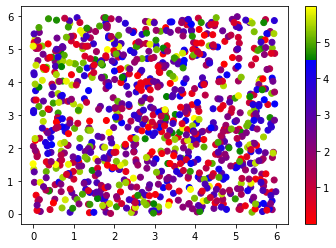

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np


def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)


c = mcolors.ColorConverter().to_rgb
rvb = make_colormap(
    [c('red'),  c('orange'), c('violet'), c('blue'),0.76 , c('green'), c('yellow')])
N = 1000
array_dg = np.random.uniform(0, 6, size=(N, 2))
colors = np.random.uniform(0, 6, size=(N,))
plt.scatter(array_dg[:, 0], array_dg[:, 1], c=colors, cmap=rvb)
plt.colorbar()

In [8]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
 
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
# Adapted from http://spartanideas.msu.edu/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
cmap_set1 = ListedColormap(['#4daf4a', '#377eb8', '#e41a1c' ])

In [9]:
y = np.random.uniform(0, 5, size=(7,))
print(y)
#y = [0.65969493 3.22287549 2.89750594 0.92066918 0.30156325 4.50262006 4.70370447]
y_cluster = [784, 840, 1418, 1073, 1743, 1100, 365]
# y = cluster_counts   

[1.50868676 4.04834618 3.3428134  2.08572602 4.28622329 1.49953145
 4.32326514]


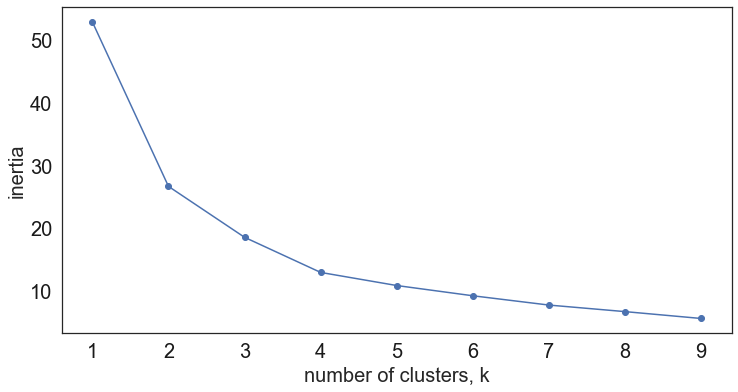

6    63
3    59
1    59
2    53
0    34
5    30
4     3
Name: cluster_labels, dtype: int64


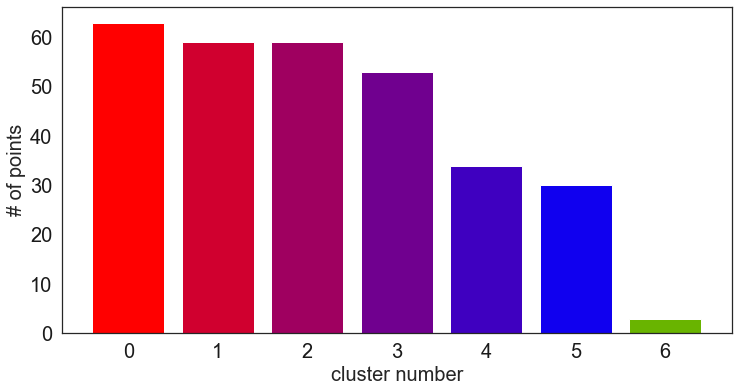

In [10]:
### How to choose number of clusters
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k , random_state=3425)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
#namebank =[0,0.61, 0.68, 0.70, 0.73, 0.80, 0.85, 0.81,0.70]
sns.set(rc={"figure.figsize": (12, 6)})
sns.set_style("white")
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k', size=20)
plt.ylabel('inertia', size=20)
plt.xticks(ks)
plt.tick_params(direction='out', length=6, width=2, colors='k')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True, which='major', axis='y', color="white", linewidth=1, zorder=1)
#plt.text(ks[0], inertias[0], namebank[0], horizontalalignment='center', verticalalignment='center', size=20)
#plt.text(ks[1], inertias[1], namebank[1], horizontalalignment='center', verticalalignment='center', size=20)
#plt.text(ks[2], inertias[2], namebank[2], horizontalalignment='center', verticalalignment='center', size=20)
#plt.text(ks[3], inertias[3], namebank[3], horizontalalignment='center', verticalalignment='center', size=20)
#plt.text(ks[4], inertias[4], namebank[4], horizontalalignment='center', verticalalignment='center', size=20)
#plt.text(ks[5], inertias[5], namebank[5], horizontalalignment='center', verticalalignment='center', size=20)
#plt.text(ks[6], inertias[6], namebank[6], horizontalalignment='center', verticalalignment='center', size=20)
#plt.text(ks[7], inertias[7], namebank[7], horizontalalignment='center', verticalalignment='center', size=20)
#plt.text(ks[8], inertias[8], namebank[8], horizontalalignment='center', verticalalignment='center', size=20)
plt.show()
############################
sns.set(rc={"figure.figsize": (12, 6)})
sns.set_style("white")
cluster = KMeans(n_clusters=7)
X['cluster_labels'] = cluster.fit_predict(X)
cluster_counts = X.cluster_labels.value_counts(sort=True)
x= np.arange(7).astype(float) #[0,1,2,3,4,5,6] sns.barplot
y_cluster = cluster_counts
print(cluster_counts)
plt.bar(x , y_cluster, color = rvb (x/7))
plt.xlabel('cluster number', size=20);
plt.ylabel('# of points', size=20);
plt.tick_params(direction='out', length=6, width=2, colors='k')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True, which='major', axis='y', color="white", linewidth=1, zorder=1)

In [11]:
# Your turn.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.6974469646079018
For n_clusters = 3 The average silhouette_score is : 0.6885658477625201
For n_clusters = 4 The average silhouette_score is : 0.7022357330426284
For n_clusters = 5 The average silhouette_score is : 0.7884111332058436
For n_clusters = 6 The average silhouette_score is : 0.8161470456312515
For n_clusters = 7 The average silhouette_score is : 0.8266106582396759
For n_clusters = 8 The average silhouette_score is : 0.7731563552211494
For n_clusters = 9 The average silhouette_score is : 0.6922972925065448


In [13]:
# Create scaler: scaler
scaler = StandardScaler()
# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=7)
# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(X)
labels_s = pipeline.predict(X)
region = pd.DataFrame({'classification':labels_s})
region.head()
region.to_csv('region.csv', index=False)


In [14]:
# Create a normalizer: normalizer
normalizer = Normalizer()
kmeans = KMeans(n_clusters=7, random_state=0)
# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)
# Fit pipeline to the daily price movements
pipeline.fit(X)
# Calculate the cluster labels: labels
labels = pipeline.predict(X)
# Create crosstab: ct
#ct = pd.crosstab(df['labels'], df['species'])



### TSNE:t-distributed stochastic neighbor embedding

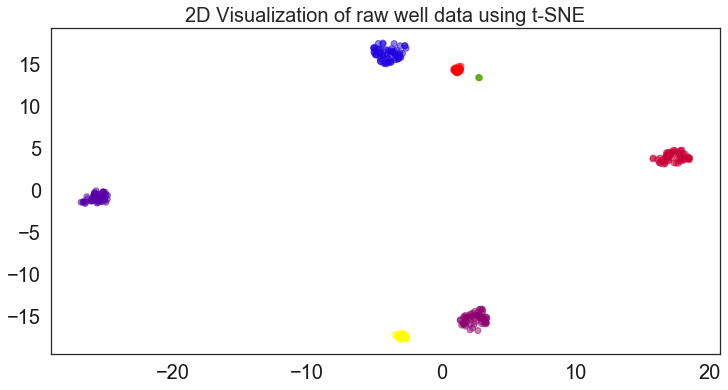

In [25]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200, random_state=10, perplexity=50)
y=region['classification']
# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]
sns.set(rc={"figure.figsize": (12, 6)})
sns.set_style("white")
# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=y,alpha=0.5, cmap= rvb ) #
plt.title('2D Visualization of raw well data using t-SNE', size=20);
plt.tick_params(direction='out', length=6, width=2, colors='k')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True, which='major', axis='y', color="white", linewidth=1, zorder=1)
plt.show()
# Import TSNE


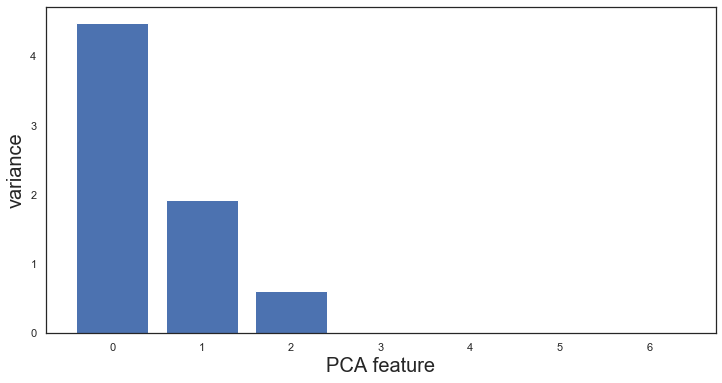

In [17]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(X)

# Plot the explained variances
features = range(pca.n_components_)
sns.set(rc={"figure.figsize": (12, 6)})
sns.set_style("white")
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature',  size=20)
plt.ylabel('variance',  size=20)
plt.xticks(features)
plt.show()




In [18]:
from sklearn.preprocessing import scale
scaled_samples = scale(X)
pca = PCA(n_components=4)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples) #scaled_samples

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples) 

# Print the shape of pca_features
print(pca_features.shape)


(301, 4)


In [19]:
reduced_data = PCA(n_components=2).fit_transform(X)

In [57]:
reduced_data

array([[ 2.75697394, -0.19596751],
       [ 2.7581486 , -0.2008322 ],
       [ 2.75966785, -0.20730248],
       ...,
       [-0.34841437,  0.54998255],
       [-0.34841437,  0.54998255],
       [-0.34841437,  0.54998255]])

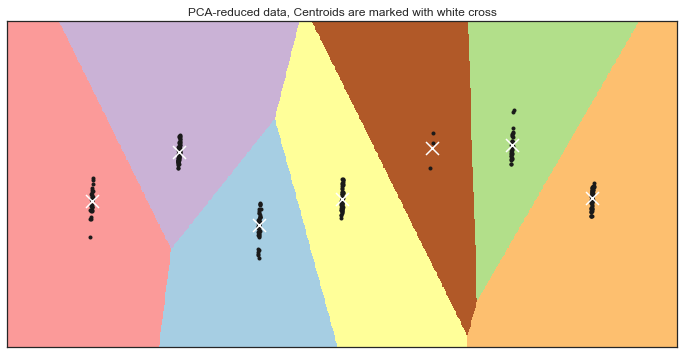

In [20]:
 ##Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init='k-means++', n_clusters=7, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
labels = Z

# Put the result into a color plot
Z = Z.reshape(xx.shape)

sns.set(rc={"figure.figsize": (12, 6)})
sns.set_style("white")
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=6)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w',  zorder=10)
plt.title('PCA-reduced data, Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [21]:
region1 = pd.DataFrame({'classification':y})
region1.to_csv('region.csv')

### Plotting welllog

In [22]:
feature_columns =  'Depth Gamma-ray density Vp Vs Density_porosity Poissons_ratio classification'.split()
las = las_old[feature_columns]

In [23]:
default_color='C0'
def mpwell(tracks, title=None, mindepth=None, maxdepth=None, tagged_depths=None):
    """Create a well log using matplotlib.
       tracks: list of tracks. Each track is a dictionary with a 'traces'
       key (required), and possibly keys that describe the scale (log or linear)
       and appearance of the track. The 'traces' key points to a list of traces.
       Each trace is a dictionary containing a 'data' key that points to a Pandas
       DataFrame that contains the data to be plotted. The DataFrame must have
       a column named 'depth' that contains the depth in the desired units, and 
       also a column named the same as value of the 'curve' key in the trace. The
       trace dictionary may also have a 'label' key that provides the log mnemonic 
       for the trace, and additional keys that describe the appearance of the trace.
       title: Display title for the log.
       mindepth: minimum depth to be plotted. Optional. Determined from the first trace
       of the first track, if not specified.
       maxdepth: maximum depth to be plotted. Optional. Determined from the first trace
       of the first track, if not specified.
       tagged_depths: List of depths which should be marked on the logs with a horizontal
       line.
    """
    sns.set(rc={"figure.figsize": (14, 16)})
    sns.set_style("white")
    majorLocator = MultipleLocator(50) #50
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(10) #10
    f, axs = plt.subplots(nrows=1, ncols=len(tracks), figsize=(14, 16))
    #if title:
       # f.suptitle(title, fontsize=22)
    # reserve space at the top and between subplots
    f.subplots_adjust(top=0.99,wspace=0.25)
    first_trace_data = tracks[0]['traces'][0]['data']
    if mindepth is None:
        mindepth = min(first_trace_data['depth'])
    if maxdepth is None:
        maxdepth = max(first_trace_data['depth'])
    # set up each track
    for ax in axs:
        ax.set_ylim(mindepth,maxdepth)
        #ax.invert_yaxis()
        ax.get_xaxis().set_visible(True)
        ax.get_yaxis().set_visible(True)
        ax.yaxis.set_minor_locator(minorLocator)
        ax.yaxis.set_major_locator(majorLocator)
        ax.yaxis.grid(b=True, which='major', color='k', linestyle='-')
        ax.yaxis.grid(b=True, which='minor', color='k', linestyle='-', alpha=0.5)
        ax.minorticks_on()
        
    # plot each trace in each track
    for num_track, track in enumerate(tracks):
        for i, trace in enumerate(track['traces']):
            fill = track.get('fill', trace['fill'])
            color = track.get('color', trace['color'])
            label = trace.get('label', trace['curve'])
            ls = trace.get('ls', '-')
            marker = trace.get('marker', 'None')
            axi = axs[num_track].twiny()
            axi.set_ylim(mindepth, maxdepth)
            
            
            axi.set_xlabel(label, color=color, labelpad=5, fontsize=14)

            if (fill == 1):
                class_depth(axi,tagged_depths, label, color)
                axi.minorticks_off()
                axi.grid(False)
            else:
                axi.plot(tracks[num_track]['traces'][0]['data'], tagged_depths, ls=ls, marker=marker, color=color)
               # axi.set_xlim(*trace['range'])
                axi.spines['top'].set_position(('outward', 5+30*i))
                axi.spines['top'].set_color(color)
                axi.xaxis.set_ticks(trace['range'])
                axi.tick_params(axis='x', colors=color, length=0)
                #plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.2)
                extent= (trace['range'][1] - trace['range'][0])/5
                extent1= extent/3
                majorLocator1 = MultipleLocator(extent)
                minorLocator1 = MultipleLocator(extent1)
                axi.xaxis.set_major_locator(majorLocator1)
                axi.xaxis.set_minor_locator(minorLocator1)
                axi.xaxis.grid(b=True, which='major', color='k', linestyle='-')
                axi.xaxis.grid(b=True, which='minor', color='r', linestyle='-.', alpha=0.2)
                x_pos=[trace['range'][0],trace['range'][0]+extent, trace['range'][0]+2*extent,\
                       trace['range'][0]+3*extent,trace['range'][0]+4*extent,trace['range'][1]]
                x_pos_label=[trace['range'][0], '','','','', trace['range'][1]]
                axi.set_xticks(x_pos)
                axi.set_xticklabels(x_pos_label, rotation = 0)
                axi.invert_yaxis()
                
                
            if 'xref' in trace:
                axi.axvline(trace['xref'], color='k', linestyle='--')
           
            
            if num_track>0:
                axi.set_yticklabels([])
                #axi.set_yticklabels()
            else:
                # Turn off the "offset" in the y-axis labeling
                y_formatter = mpl.ticker.ScalarFormatter(useOffset=False)
                axi.yaxis.set_major_formatter(y_formatter)
                
        axs[0].set_ylabel('Depth (ft)',fontsize=16)
    return f

In [24]:
#f,ax = plt.subplots(figsize=(5, 20))
def class_depth (ax, depth, label, color):

    patches = []
    for i in range(len(las)):
        poly=Rectangle((0,depth[i]), 4, 1)
    #poly=Rectangle([(0, depth[i]), (5, depth[i]), (0 , depth[i]+1), (5 , depth[i]+1) ], True)
        patches.append(poly)

    p = PatchCollection(patches, match_original=False, cmap=rvb, alpha=0.7)

    colors = 100*np.array(las.classification)
    print(np.unique(colors))
    p.set_array(np.array(colors))
#p.set_array(np.array(colors))
    ax.add_collection(p)
    ax.invert_yaxis()
    ax.set_xlabel(label, color=color, labelpad=5, fontsize=14)
    x_pos_label=['', '','','']
    ax.set_xticklabels(x_pos_label, rotation = 0)
    ax.get_xaxis().set_visible(True)
    #ax.set_xlim([0,4])

[  0 100 200 300 400 500 600]


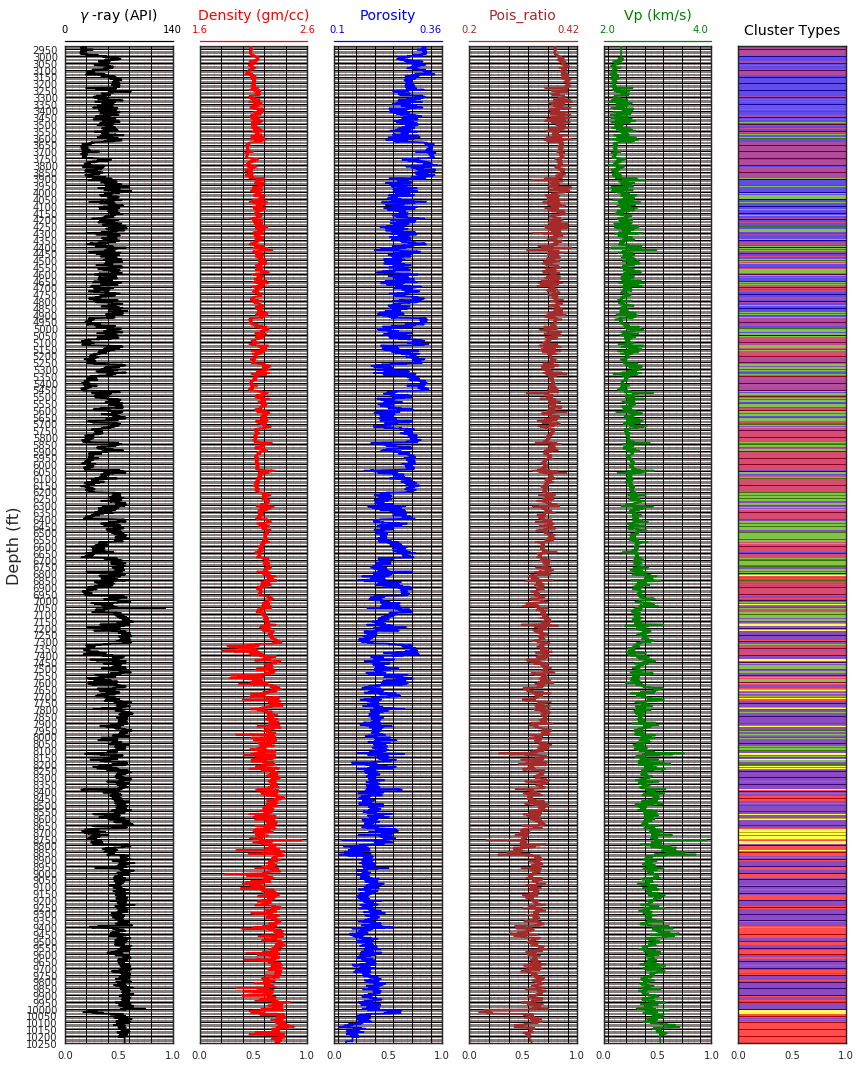

In [122]:
trace11 = {'data': las['Gamma-ray'], 'curve': '$\gamma$ -ray (API)', 'color': 'k', 'fill':0,'range': (0, 140)}
track1 = {'traces': [trace11]}
trace21 = {'data': las['density'], 'curve': 'Density (gm/cc)', 'color': 'r','fill':0,'range': (1.6, 2.6)}
track2 = {'traces': [trace21]}
trace31 = {'data': las['Density_porosity'], 'curve': 'Porosity', 'color': 'b', 'fill':0,'range': (0.1, 0.36)}
track3 = {'traces': [trace31]}
trace41 = {'data': las['Poissons_ratio'], 'curve': 'Pois_ratio', 'color':'brown' ,'fill':0,'range': (0.2, 0.42)}
track4 = {'traces': [trace41]}
trace51 = {'data': las['Vp'], 'curve': 'Vp (km/s)', 'color':'g','fill':0,'range': (2.0, 4.0)}
track5 = {'traces': [trace51]}
trace61 = {'data': region1['classification'], 'curve': 'Cluster Types', 'color':'Black', 'fill':1,'range': (0,4)}
track6 = {'traces': [trace61]}
tracks = [track1, track2, track3, track4, track5, track6]
xrd_depths = las['Depth']
log = mpwell(tracks, 'My well', min(xrd_depths), max(xrd_depths), las['Depth'].values ) #